# Análise do risco de inadimplência dos mutuários

Seu projeto é preparar um relatório para a divisão de empréstimos de um banco. Você precisará descobrir se o estado civil de um cliente e o número de filhos têm impacto sobre se ele deixará de pagar um empréstimo. O banco já tem alguns dados sobre a capacidade de crédito dos clientes.

Seu relatório será considerado ao criar uma **pontuação de crédito** de um cliente em potencial. A **contagem de crédito** é usada para avaliar a capacidade de um devedor em potencial de pagar seu empréstimo.

[Neste caderno, você recebe dicas e instruções breves e sugestões de raciocínio. Não os ignore, pois eles são projetados para te equipar com a estrutura do projeto e o ajudarão a analisar o que você está fazendo em um nível mais profundo. Antes de enviar seu projeto, certifique-se de remover todas as dicas e descrições fornecidas a você. Em vez disso, faça com que este relatório pareça que você está enviando para seus colegas de equipe para demonstrar suas descobertas - eles não devem saber que você teve qualquer ajuda externa nossa! Para ajudá-lo, colocamos as dicas que você deve remover entre colchetes.]



O propósito do projeto é uma análise de risco, com o intuito de previnir inadimplência por parte dos pretensos clientes, já que em um empréstimo as características dos clientes e o risco do mercado importam. 
Caracteristicas como: quantidade de filhos, idade, quanto ganha, tipo de trabalho, fonte de renda importam, onde mora, quais riscos se expõe no trabalho se risco de morte, ou acidente interefere na decisão de tomada de risco por parte do banco pois diz respeito a capacidade do cliente cumprir com a sua dívida.

## Abra o arquivo de dados e veja as informações gerais.



In [2]:

import pandas as pd
import warnings

warnings.filterwarnings("ignore")



try:
    df = pd.read_csv(r'credit_scoring_eng.csv')

except:
    df = pd.read_csv(r'/datasets/credit_scoring_eng.csv')




## Tarefa 1. Exploração de dados

**Descrição dos dados**
- `children` - o número de crianças na família
- `days_employed` - experiência de trabalho em dias
- `dob_years` - idade do cliente em anos
- `education` - educação do cliente
- `education_id` - identificador de educação
- `family_status` - estado civil do cliente
- `family_status_id` - identificador de estado civil
- `gender` - gênero do cliente
- `income_type` - tipo de emprego
- `debt` - havia alguma dívida no pagamento do empréstimo
- `total_income` - renda mensal
- `purpose` - o objetivo de obter um empréstimo



In [3]:
# Vamos ver quantas linhas e colunas nosso conjunto de dados tem
df.shape

(21525, 12)

In [4]:
# vamos exibir as primeiras N linhas
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [5]:
# Obter informações sobre dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
df['education'] = df['education'].str.lower()
df['education'] = df['education'].str.replace(' ','_')
df['education'] = df['education'].str.replace("'",'')



In [7]:
df.education.unique()



array(['bachelors_degree', 'secondary_education', 'some_college',
       'primary_education', 'graduate_degree'], dtype=object)

In [8]:
df.family_status.unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [9]:
df.gender.unique()

array(['F', 'M', 'XNA'], dtype=object)

In [10]:
df.income_type.unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [11]:
df.purpose.unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [12]:
df['purpose'] =  df.purpose.str.replace(r'.*(real estate|housing|house|property).*',
    'Real Estate')
df['purpose'] =  df.purpose.str.replace(r'.*(wedding).*',
    'Wedding')    
df['purpose'] =  df.purpose.str.replace(r'.*(education|university|educated).*',
    'Education')
df['purpose'] =  df.purpose.str.replace(r'.*(car).*',
    'Car')

In [13]:
df.purpose.unique()

array(['Real Estate', 'Car', 'Education', 'Wedding'], dtype=object)

In [14]:
df.debt.unique()

array([0, 1], dtype=int64)

In [15]:
df.isna().sum()


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Há Valores ausentes, apenas nas colunas : days_employed e total_income. Há valores errados em days_employed.

In [16]:
df.isna().sum()


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

> Como os valores são iguais eles têm alguma relação, pois se referem a pessoas que não possuem horas trabalhadas, logo não terão nenhum rendimento declarado. Mas o dado apresenta outras informações, como por exemplo, a escolaridade dessas pessoas e a fonte da renda, mesmo os valores sendo ausentes.

In [17]:
# Vamos aplicar várias condições para filtrar dados e observar o número de linhas na tabela filtrada.
valores_ausentes = df[df['days_employed'].isnull()]
valores_ausentes




,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary_education,1,civil partnership,1,M,retiree,0,NaN,Wedding
26,0,NaN,41,secondary_education,1,married,0,M,civil servant,0,NaN,Education
29,0,NaN,63,secondary_education,1,unmarried,4,F,retiree,0,NaN,Real Estate
41,0,NaN,50,secondary_education,1,married,0,F,civil servant,0,NaN,Car
55,0,NaN,54,secondary_education,1,civil partnership,1,F,retiree,1,NaN,Wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,secondary_education,1,married,0,M,business,0,NaN,Car
21495,1,NaN,50,secondary_education,1,civil partnership,1,F,employee,0,NaN,Wedding
21497,0,NaN,48,bachelors_degree,0,married,0,F,business,0,NaN,Real Estate
21502,1,NaN,42,secondary_education,1,married,0,F,employee,0,NaN,Real Estate


# **Conclusão intermediária**


O valor de linhas filtradas correspondem aos valores ausentes, pois as relação entre as duas colunas é lógica, sem tempo trabalhado sem rendimento.
Mas comparando a os valores com as outras informações contidas dos dados, vemos que há informações que destoam da realidade, como por exemplo nível de escolaridade, idade, tipo de emprego e o objetivo.

Em relação ao conjunto de dados os dados ausentes correspondem a 10,09%, ou seja, uma quantidade que teria expressividade, a <i>primo ictu oculi</i>.

Ainda há a necessidade de averiguar essa porcentagem em relação aos outros dados da tabela. como por exemplo, quantos dados ausentes há em cada caracteristica da expressa na coluna <i>"income_type"</i> e descobrir qual a porcentagem que esse valor representa. Desta forma ter mais informações para saber o que fazer com esses dados e como fazer.



In [18]:
# Vamos investigar clientes que não possuem dados sobre as características identificadas e a coluna com os valores ausentes
pivot = pd.pivot_table(df, values='total_income', index=[ 'education', 'income_type'], aggfunc={'mean', 'count'})
pivot


count          mean
education           income_type                                     
bachelors_degree    business                      1600  38780.136881
                    civil servant                  488  31571.287664
                    employee                      2105  30650.288996
                    entrepreneur                     1  79866.103000
                    retiree                        520  27306.878056
                    student                          1  15712.260000
                    unemployed                       1  32435.602000
graduate_degree     civil servant                    1  17822.757000
                    employee                         3  31089.653667
                    retiree                          2  28334.215000
primary_education   business                        29  26409.124931
                    civil servant                    6  29449.016667
                    employee                       133  21954.056075
                    retiree                         93  17810.387914
secondary_education business                      2687  28718.435242
                    civil servant                  771  24648.816597
                    employee                      7440  24426.079549
                    paternity / maternity leave      1   8612.661000
                    retiree                       2793  21071.829349
                    unemployed                       1   9593.119000
some_college        business                       261  31623.893705
                    civil servant                   46  27596.312587
                    employee                       333  27951.531586
                    retiree                         35  22129.937314

In [19]:
pivot2 = pd.pivot_table(valores_ausentes, values='dob_years', index=['education', 'income_type'], aggfunc={'count'})
pivot2

count
education           income_type         
bachelors_degree    business         188
                    civil servant     62
                    employee         236
                    entrepreneur       1
                    retiree           57
primary_education   business           1
                    civil servant      2
                    employee          12
                    retiree            6
secondary_education business         299
                    civil servant     77
                    employee         820
                    retiree          344
some_college        business          20
                    civil servant      6
                    employee          37
                    retiree            6

In [20]:
# Verificar a distribuição
ausentes = df['days_employed'].isna().sum()
linhas = df.shape[0]
pct_ausentes = (ausentes / linhas) * 100
pivot2['distribuicao'] = (pivot2['count'] / pivot['count']) * 100
pivot2


count  distribuicao
education           income_type                       
bachelors_degree    business         188     11.750000
                    civil servant     62     12.704918
                    employee         236     11.211401
                    entrepreneur       1    100.000000
                    retiree           57     10.961538
primary_education   business           1      3.448276
                    civil servant      2     33.333333
                    employee          12      9.022556
                    retiree            6      6.451613
secondary_education business         299     11.127652
                    civil servant     77      9.987030
                    employee         820     11.021505
                    retiree          344     12.316506
some_college        business          20      7.662835
                    civil servant      6     13.043478
                    employee          37     11.111111
                    retiree            6     17.142857


Os ausentes parecem manter um padrão entre 10% das caracteristicas , não destoando muito da ausência total.

**Possíveis motivos para valores ausentes nos dados**

Acredito haver um padrão, na ausência dos valores, podendo ser em decorrência de algum erro na hora de colheita dos dados, pois hora trabalhada e total de rendimento e isso é lógico. Pois como exposto acima, "sem horas trabalhadas sem rendimento". Mesmo havendo dados de escolaridade, idade, e até algun valores ausentes possuindo débitos, pode ter havido um erro na colheita de dados ou o valor foi informado errado, ou contabilizado/interpretado de forma errônea, pois há dados que me causam certa estranheza, como por exemplo, horas trabalhadas negativas.


array([[<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'days_employed'}>,
        <AxesSubplot:title={'center':'dob_years'}>],
       [<AxesSubplot:title={'center':'education_id'}>,
        <AxesSubplot:title={'center':'family_status_id'}>,
        <AxesSubplot:title={'center':'debt'}>],
       [<AxesSubplot:title={'center':'total_income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

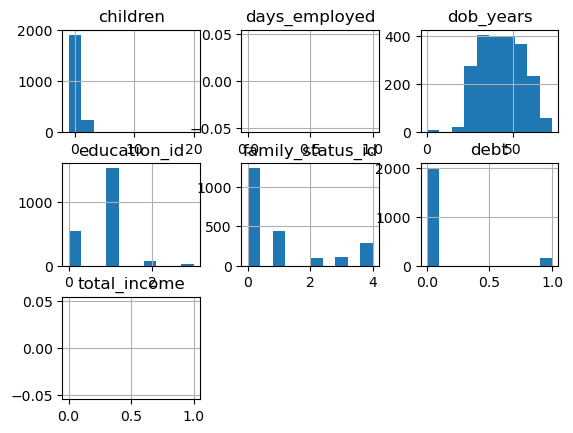

In [21]:
# Verificar a distribuição em todo o conjunto de dados
valores_ausentes.hist()

Bem, o padrão é claro, quando analisado o conjunto de dados. Por exemplo, a coluna days_employed, há valores errados e há valores 'NaN', como por exemplos valores "infinitos" ou valores muito acima da normalidade, como por exemplo pessoas com mais de 100 anos trabalhados, mas o que mais deixa explícito a correlação da ausência nas colunas é a própria correlação entre as tabelas, afinal, renda e dias trabalhados são indissociáveis .

In [22]:
df.education

0           bachelors_degree
1        secondary_education
2        secondary_education
3        secondary_education
4        secondary_education
                ...         
21520    secondary_education
21521    secondary_education
21522    secondary_education
21523    secondary_education
21524    secondary_education
Name: education, Length: 21525, dtype: object

In [23]:
df.education.unique()


array(['bachelors_degree', 'secondary_education', 'some_college',
       'primary_education', 'graduate_degree'], dtype=object)

In [24]:
df.children.unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [25]:
child_dist = df[(df.children == 20)| (df.children == -1) ]
child_dist
linhas
pct_child = (child_dist.shape[0] / linhas) * 100
pct_child 

0.5714285714285714

Há coisas estranhas como por exemplo a quantidade de filho: -1, por motivos óbvios e casais com 20 filhos. Possivelmente, algum erro no input da informação, como por exemplo o número 20, se observarmos o teclado numérico do computador o 2 fica logo acima do zero, sendo muito possível esbarrar e não perceber na hora de colocar o dado, devido a velocidade da digitação. 
O -1 pode ter acontecido a mesma coisa. 

Os dois valores tidos como estranhos correspondem, apenas, a 0,57% de toda a tabela, mais uma vez isso reforça a possibilidade de erro humano na inserção dos dados. 

In [26]:
df['children'] = df.children.abs()
df['children'] = df['children'].replace({20: 2})

In [27]:
child_dist

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
291,-1,-4417.703588,46,secondary_education,1,civil partnership,1,F,employee,0,16450.615,Education
606,20,-880.221113,21,secondary_education,1,married,0,M,business,0,23253.578,Real Estate
705,-1,-902.084528,50,secondary_education,1,married,0,F,civil servant,0,22061.264,Car
720,20,-855.595512,44,secondary_education,1,married,0,F,business,0,18079.798,Real Estate
742,-1,-3174.456205,57,secondary_education,1,married,0,F,employee,0,10282.887,Education
...,...,...,...,...,...,...,...,...,...,...,...,...
21140,-1,-1422.668059,44,secondary_education,1,married,0,F,business,0,27129.935,Real Estate
21325,20,-601.174883,37,secondary_education,1,married,0,F,business,0,16477.771,Education
21390,20,NaN,53,secondary_education,1,married,0,M,business,0,NaN,Real Estate
21404,20,-494.788448,52,secondary_education,1,married,0,M,business,0,25060.749,Real Estate


In [28]:
df.days_employed.describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

In [29]:
df.days_employed.unique()

array([-8437.67302776, -4024.80375385, -5623.42261023, ...,
       -2113.3468877 , -3112.4817052 , -1984.50758853])

In [30]:
df[df['days_employed']==-18388.949900568383]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16335,1,-18388.949901,61,secondary_education,1,married,0,F,employee,0,29788.629,Real Estate


In [31]:
neg_days = df[df['days_employed'] < 0]
pct_day = (neg_days.shape[0] / linhas) * 100
pct_day

73.89547038327527

In [32]:
df['days_employed'] = df.days_employed.abs()

In [33]:
day_na = df.days_employed.isna().sum()
pct_na = (day_na / linhas) * 100
pct_na

10.099883855981417

In [34]:
df.dob_years.describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [35]:
dob_0 = df[df['dob_years'] == 0 ]['dob_years'].count()
pct_dob = (dob_0 / linhas) * 100
pct_dob

0.4692218350754936

In [36]:
drop_lines = df[df['dob_years'] == 0]
drop_lines.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,secondary_education,1,married,0,F,retiree,0,11406.644,Car
149,0,2664.273168,0,secondary_education,1,divorced,3,F,employee,0,11228.230,Real Estate
270,3,1872.663186,0,secondary_education,1,married,0,F,employee,0,16346.633,Real Estate
578,0,397856.565013,0,secondary_education,1,married,0,F,retiree,0,15619.310,Real Estate
1040,0,1158.029561,0,bachelors_degree,0,divorced,3,F,business,0,48639.062,Car


A minha intenção é dele excluir, pois como posto no início, a idade é um fator determinante de risco de adimplemento, pois se a instituição financeira não conhece a idade do cliente não tem como aferir o eventuais riscos advindos da idade. 

In [37]:
df.drop(df[df['dob_years'] == 0].index, inplace=True)



In [38]:

drop_lines.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,secondary_education,1,married,0,F,retiree,0,11406.644,Car
149,0,2664.273168,0,secondary_education,1,divorced,3,F,employee,0,11228.230,Real Estate
270,3,1872.663186,0,secondary_education,1,married,0,F,employee,0,16346.633,Real Estate
578,0,397856.565013,0,secondary_education,1,married,0,F,retiree,0,15619.310,Real Estate
1040,0,1158.029561,0,bachelors_degree,0,divorced,3,F,business,0,48639.062,Car


In [39]:

df.family_status.unique()


array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [40]:

family = {'civil partnership':'civil_partnership', 
          'widow / widower': 'widow/widower'}
df['family_status'].replace({'civil partnership':'civil_partnership', 
                             'widow / widower': 'widow/widower'}, inplace=True)


In [41]:

df.family_status.unique()

array(['married', 'civil_partnership', 'widow/widower', 'divorced',
       'unmarried'], dtype=object)

In [42]:

df.gender.unique()

array(['F', 'M', 'XNA'], dtype=object)

In [43]:

df.isna().sum()

children               0
days_employed       2164
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2164
purpose                0
dtype: int64

In [44]:

df['gender'].replace('XNA', 'not_informed', inplace= True)
df.gender.unique()


array(['F', 'M', 'not_informed'], dtype=object)

In [45]:

df.income_type.unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [46]:

df['income_type'].replace({'civil servant':'civil_servant', 
                             'paternity / maternity leave': 'paternity/maternity_leave'}, inplace=True)

In [47]:

df.income_type.unique()


array(['employee', 'retiree', 'business', 'civil_servant', 'unemployed',
       'entrepreneur', 'student', 'paternity/maternity_leave'],
      dtype=object)

In [48]:
# Verificar duplicatas
df[df.duplicated()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
360,0,NaN,27,secondary_education,1,married,0,M,business,0,NaN,Real Estate
829,0,NaN,57,secondary_education,1,civil_partnership,1,F,business,0,NaN,Education
1010,0,NaN,66,secondary_education,1,married,0,F,retiree,0,NaN,Real Estate
1072,0,NaN,44,secondary_education,1,civil_partnership,1,F,employee,0,NaN,Real Estate
1247,0,NaN,54,secondary_education,1,civil_partnership,1,M,employee,0,NaN,Wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21364,0,NaN,50,secondary_education,1,married,0,M,employee,0,NaN,Real Estate
21391,0,NaN,52,secondary_education,1,married,0,F,business,0,NaN,Real Estate
21414,0,NaN,65,secondary_education,1,married,0,F,retiree,0,NaN,Real Estate
21415,0,NaN,54,secondary_education,1,married,0,F,retiree,0,NaN,Real Estate


Diante das variáveis dos dados não podemos ser categóricos a respeito da existência ou não de duplicatas pois não temos uma coluna de dados que individualize o cliente, assim pode existir N pessoas com características iguais entre si.


In [49]:
# Última verificação se temos duplicatas
df.education.unique()

array(['bachelors_degree', 'secondary_education', 'some_college',
       'primary_education', 'graduate_degree'], dtype=object)

### Restaurar valores ausentes em `total_income`

In [50]:
# Vamos escrever uma função que calcule a categoria de idade
def calc_idade(x):
    if 10 < x < 20:
        return '10-20'

    elif 20 <= x < 30:
        return '20-30'

    elif 30 <= x < 40:
        return '30-40'

    elif 40 <= x < 50:
        return '40-50'

    elif 50 <= x < 60:
        return '50-60'

    elif 60 <= x <70:
        return '60-70'
        
    else:
        return '70+'    

In [51]:
# Teste da
calc_idade(65)

'60-70'

In [52]:
# Criar coluna nova com base na função
df['age_group'] = df['dob_years'].apply(calc_idade)



In [53]:
# Verificar como os valores na nova coluna
df[df['dob_years'] == 75 ]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
8880,0,1678.969771,75,secondary_education,1,widow/widower,2,F,civil_servant,0,24525.224,Education,70+


[Pense nos fatores dos quais a renda geralmente depende. Eventualmente, você desejará descobrir se deve usar valores médios ou medianos para substituir valores ausentes. Para tomar essa decisão, você provavelmente vai querer olhar para a distribuição dos fatores que você identificou como tendo impacto na renda de alguém.]

Analisando a distribuição no gráfico abaixo dos valores de 'total_income', podemos ver a assimetria dos dados. 
Como podemos observar, também abaixo, o valor máximo de renda recebida é 362496.645000 e o mínimo de 3306.762000.
Logo, acredito ser mais correto fazer o uso da mediana ao preencher os dados ausentes, já que a média será influenciada pelos valores nos extremos.


<AxesSubplot:title={'center':'Distribuição de Renda - KDE'}, xlabel='$', ylabel='Density'>

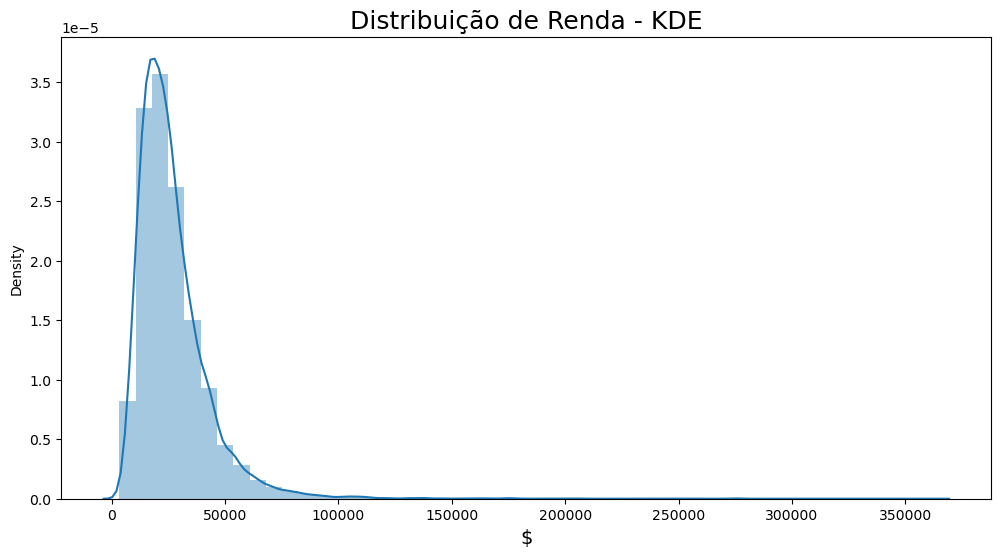

In [54]:
import seaborn as sns

na_droped = df.dropna()
ax = sns.distplot(na_droped.total_income, bins = 50)


ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Renda - KDE', fontsize=18)
ax.set_xlabel('$', fontsize=14)
ax

[Crie uma tabela que tenha apenas dados sem valores ausentes. Esses dados serão usados para restaurar os valores ausentes.]

In [55]:

na_droped.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42,bachelors_degree,0,married,0,F,employee,0,40620.102,Real Estate,40-50
1,1,4024.803754,36,secondary_education,1,married,0,F,employee,0,17932.802,Car,30-40
2,0,5623.422610,33,secondary_education,1,married,0,M,employee,0,23341.752,Real Estate,30-40
3,3,4124.747207,32,secondary_education,1,married,0,M,employee,0,42820.568,Education,30-40
4,0,340266.072047,53,secondary_education,1,civil_partnership,1,F,retiree,0,25378.572,Wedding,50-60


In [56]:
mean_droped = na_droped.groupby(['age_group', 'education'])['total_income'].mean()
mean_droped

age_group  education          
10-20      secondary_education    16011.592250
           some_college           18565.702800
20-30      bachelors_degree       29395.106109
           primary_education      27695.271520
           secondary_education    23414.838942
           some_college           25415.942463
30-40      bachelors_degree       34225.243752
           graduate_degree        18187.301500
           primary_education      21979.584515
           secondary_education    25666.783012
           some_college           31991.246531
40-50      bachelors_degree       35687.086166
           graduate_degree        31771.321000
           primary_education      23618.267667
           secondary_education    26193.975154
           some_college           33703.486528
50-60      bachelors_degree       33622.674858
           graduate_degree        42945.794000
           primary_education      17797.322623
           secondary_education    24057.271660
           some_college      

In [57]:
median_droped = na_droped.groupby(['age_group', 'education'])['total_income'].median()
median_droped


age_group  education          
10-20      secondary_education    15761.5690
           some_college           14575.7170
20-30      bachelors_degree       25956.1640
           primary_education      25488.9160
           secondary_education    21166.8520
           some_college           22698.1735
30-40      bachelors_degree       28794.9310
           graduate_degree        18187.3015
           primary_education      19542.3265
           secondary_education    22912.9930
           some_college           28463.4390
40-50      bachelors_degree       30282.3330
           graduate_degree        31771.3210
           primary_education      21511.5635
           secondary_education    22973.2580
           some_college           29323.6730
50-60      bachelors_degree       28152.1765
           graduate_degree        42945.7940
           primary_education      16922.6250
           secondary_education    21245.4820
           some_college           21132.3090
60-70      bachelors_deg

In [58]:
pivot_all = pd.pivot_table(na_droped, values='total_income', index=[ 'age_group', 'education', 'income_type', 'family_status', 'gender'], aggfunc={'mean', 'median'})

pivot_all

mean  \
age_group education           income_type family_status     gender                 
10-20     secondary_education business    civil_partnership F       16588.237000   
                                                            M       14700.281000   
                                          married           F       19321.445000   
                                          unmarried         F       15287.306500   
                              employee    married           F       21009.404000   
...                                                                          ...   
70+       secondary_education retiree     unmarried         F       16883.838125   
                                                            M       31179.426000   
                                          widow/widower     F       17302.139481   
          some_college        retiree     civil_partnership F       10903.587000   
                                          married           M       19946.795000   

                                                                        median  
age_group education           income_type family_status     gender              
10-20     secondary_education business    civil_partnership F       16588.2370  
                                                            M       14700.2810  
                                          married           F       19321.4450  
                                          unmarried         F       15287.3065  
                              employee    married           F       21009.4040  
...                                                                        ...  
70+       secondary_education retiree     unmarried         F       16210.9610  
                                                            M       35755.4510  
                                          widow/widower     F       16094.9720  
          some_college        retiree     civil_partnership F       10903.5870  
                                          married           M       19946.7950  

[560 rows x 2 columns]

Bem, o motivo de não estreitar o filtro é que quanto mais filtramos, menor serão os valores e seria difícil obter uma média ou mediana, acredito que se filtramos apenas pela faixa etária e escolaridae ou fonte de renda. Pois como vemos abaixo, é possivel alcançar uma mediana ou uma média mais condizente com a e realidade dos dados, já que não temos uma quantidade de informações grande para podermos filtrar mais precisamente. 



In [59]:
pivot_type = pd.pivot_table(na_droped, values='total_income', index=[ 'age_group','education', 'gender', 'income_type'], aggfunc={'median'})
pivot_type

median
age_group education           gender income_type            
10-20     secondary_education F      business     17954.8410
                                     employee     15986.6305
                              M      business     14700.2810
                                     employee     14934.9010
          some_college        F      business     26598.4335
...                                                      ...
70+       secondary_education M      business     19972.8130
                                     employee     34500.9895
                                     retiree      18262.7265
          some_college        F      retiree      10903.5870
                              M      retiree      19946.7950

[174 rows x 1 columns]

[Tome uma decisão sobre quais características definem mais a renda e se você usará uma mediana ou uma média. Explique por que você tomou essa decisão]


In [60]:
#  função para preencher os valores ausentes
def na_fill_median(data, group, coluna):
    df_group = data.groupby(group)[coluna].median()
    data[coluna] = data[coluna].fillna(df_group.median())

    return data




In [61]:
df = na_fill_median(df, ['age_group', 'education', 'gender', 'income_type'], 'total_income')



In [62]:
df.isna().sum()

children               0
days_employed       2164
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
age_group              0
dtype: int64

[Se você encontrou erros ao preparar os valores para dados ausentes, provavelmente significa que há algo especial nos dados da categoria. Pense um pouco - você pode querer corrigir algumas coisas manualmente, se houver dados suficientes para encontrar medianos/médios.]


In [63]:
# Substituir valores ausentes se houver algum erro


[Quando você achar que terminou com `total_income`, verifique se o número total de valores nesta coluna corresponde ao número de valores em outras.]

In [64]:
# Verificar o número de entradas nas colunas
df.isna().sum()

children               0
days_employed       2164
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
age_group              0
dtype: int64

###  Restaurar valores em `days_employed`

[Pense nos parâmetros que podem ajudá-lo a restaurar os valores ausentes nesta coluna. Eventualmente, você desejará descobrir se deve usar valores médios ou medianos para substituir valores ausentes. Você provavelmente fará uma pesquisa semelhante à que fez ao restaurar dados em uma coluna anterior.]

In [65]:
na_droped.days_employed.describe()

count     19260.000000
mean      66902.437877
std      139022.196744
min          24.141633
25%         926.851509
50%        2197.359790
75%        5539.681747
max      401755.400475
Name: days_employed, dtype: float64

In [66]:
na_droped.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42,bachelors_degree,0,married,0,F,employee,0,40620.102,Real Estate,40-50
1,1,4024.803754,36,secondary_education,1,married,0,F,employee,0,17932.802,Car,30-40
2,0,5623.422610,33,secondary_education,1,married,0,M,employee,0,23341.752,Real Estate,30-40
3,3,4124.747207,32,secondary_education,1,married,0,M,employee,0,42820.568,Education,30-40
4,0,340266.072047,53,secondary_education,1,civil_partnership,1,F,retiree,0,25378.572,Wedding,50-60


In [67]:
na_droped.groupby('income_type')['days_employed'].max() / 365.25

income_type
business                       48.228784
civil_servant                  41.596255
employee                       50.346201
entrepreneur                    1.426004
paternity/maternity_leave       9.026037
retiree                      1099.946339
student                         1.584535
unemployed                   1082.280188
Name: days_employed, dtype: float64

Bem, com esses podemos ver que os dados a respeito dos dias empregados encontram-se com erros, que não foram abordados no inicio, pois esse foi o momento que se concentrou em buscar erros fácil percepção.
Portanto, agora, haverá o tratamento correspondente a esse erro.  

In [68]:
na_droped.groupby('age_group')['days_employed'].max() / 365.25

age_group
10-20       2.793109
20-30    1066.111342
30-40    1093.115533
40-50    1097.752903
50-60    1099.946339
60-70    1099.837951
70+      1098.786226
Name: days_employed, dtype: float64

In [69]:
import numpy as np
na_droped.loc[df['income_type'].eq('retiree'), 'days_employed'] = np.nan
na_droped.loc[df['income_type'].eq('unemployed'), 'days_employed'] = np.nan

In [70]:
na_droped.groupby('age_group')['days_employed'].median() / 365.25

age_group
10-20    1.983553
20-30    2.736688
30-40    4.352584
40-50    5.530721
50-60    6.192643
60-70    7.307526
70+      7.338077
Name: days_employed, dtype: float64

In [71]:
pivot_days = pd.pivot_table(na_droped, index= ['age_group','income_type'], values='days_employed', aggfunc={'mean', 'median'})/365,25
pivot_days

(                                          mean     median
 age_group income_type                                    
 10-20     business                    1.438733   1.906764
           civil_servant               1.397178   1.397178
           employee                    2.220210   2.183517
 20-30     business                    3.109385   2.506869
           civil_servant               4.385703   3.771305
           employee                    3.298490   2.768109
           entrepreneur                1.426981   1.426981
           student                     1.585621   1.585621
 30-40     business                    5.081080   4.183171
           civil_servant               7.573801   7.101060
           employee                    5.509053   4.185309
           paternity/maternity_leave   9.032219   9.032219
 40-50     business                    6.786346   5.196080
           civil_servant              11.047723   9.730437
           employee                    7.324111   5.2169

In [72]:
na_droped[na_droped['days_employed'] > 15000 ]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
1539,0,15785.678893,59,bachelors_degree,0,unmarried,4,F,employee,0,19130.216,Real Estate,50-60
3974,0,15835.725775,64,secondary_education,1,civil_partnership,1,F,business,0,15497.365,Wedding,60-70
4299,0,17615.563266,61,secondary_education,1,married,0,F,business,0,19609.719,Real Estate,60-70
4321,0,15773.061335,61,secondary_education,1,civil_partnership,1,F,employee,0,32938.974,Wedding,60-70
5581,0,15079.216069,55,secondary_education,1,married,0,F,civil_servant,0,28601.820,Real Estate,50-60
7329,0,16593.472817,60,bachelors_degree,0,married,0,F,employee,0,19951.655,Education,60-70
7731,0,15618.063786,64,secondary_education,1,married,0,F,business,0,47444.057,Education,60-70
15675,0,15410.040779,65,bachelors_degree,0,married,0,F,employee,0,30208.011,Real Estate,60-70
16335,1,18388.949901,61,secondary_education,1,married,0,F,employee,0,29788.629,Real Estate,60-70
16825,0,16119.687737,64,secondary_education,1,married,0,F,employee,0,14644.430,Real Estate,60-70


Agora, os valores parecem estar mais condizentes com a realidade.

<AxesSubplot:title={'center':'days_employed per age_group'}, xlabel='Days employed', ylabel='Age Group'>

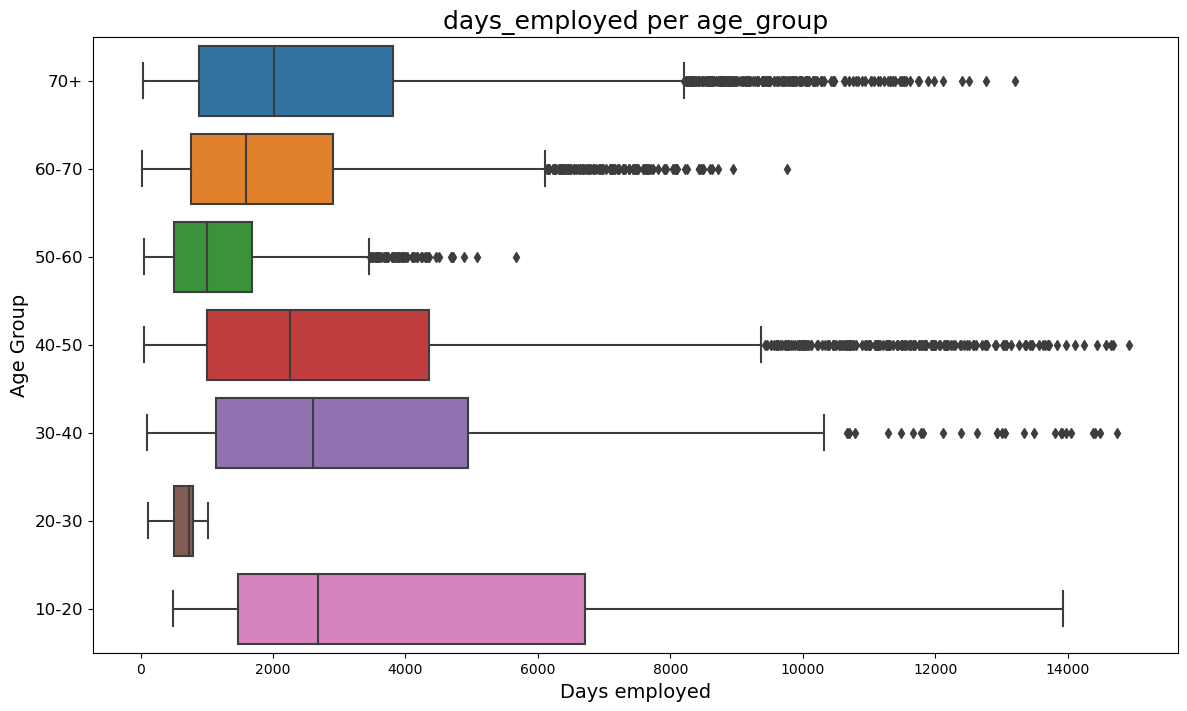

In [73]:
# Distribuição de `days_employed` medianos com base em seus parâmetros identificados
ax = sns.boxplot(x = 'days_employed', y = 'age_group', data=na_droped.query('days_employed < 15000'), orient='h')
ax.figure.set_size_inches(14, 8)    
ax.set_title('days_employed per age_group', fontsize=18)
ax.set_xlabel('Days employed', fontsize=14)
ax.set_ylabel('Age Group', fontsize=14)
ax.set_yticklabels(['70+', '60-70', '50-60', '40-50', '30-40', '20-30', '10-20'], fontsize=12)

ax




<AxesSubplot:title={'center':'days_employed per income_type'}, xlabel='Days employed', ylabel='Income Type'>

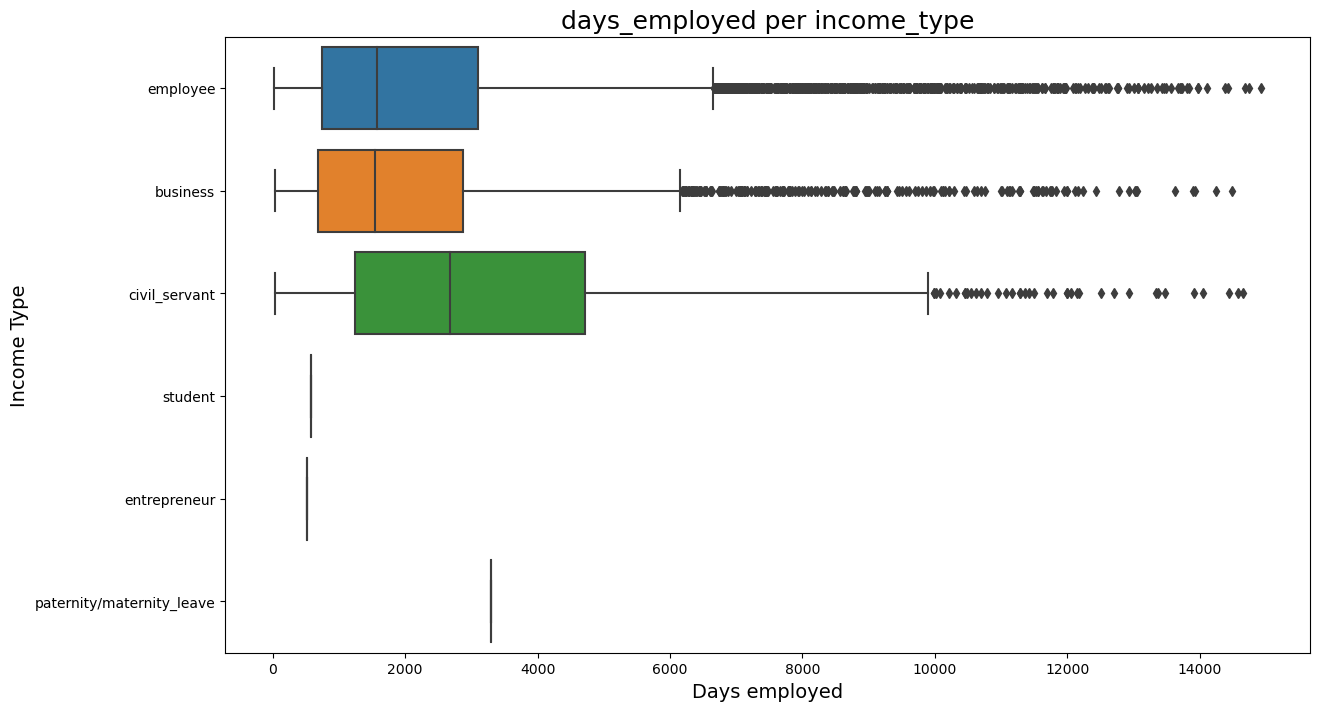

In [74]:
ax2 = sns.boxplot(x = 'days_employed', y = 'income_type', data=na_droped.query('days_employed < 15000'), orient='h')
ax2.figure.set_size_inches(14, 8)  
ax2.set_title('days_employed per income_type', fontsize=18)    
ax2.set_xlabel('Days employed', fontsize=14)    
ax2.set_ylabel('Income Type', fontsize=14)    


ax2

In [75]:
# Distribuição de `days_employed` médios com base em seus parâmetros identificados


## Médias ou medianas



>> Observando o Boxplot, percebo que os dados possuem extremos assim como o total_income isso pode adulterar a média, por isso, assim como o total_income . Ainda observando o Boxplot, vemos que as medianas não se encaixam tanto, e variando de acordo com a fonte de renda da pessoa. Portanto, há a maior inclinação em usar o filtro por age_group e income_type. Pois observo que os dados são mais harmônicos. Como a função criada no tópico anterior possue a parametrização de escolher como será o filtro e onde ele será aplicado para preencher com a mediana farei uso da mesma.



In [76]:
# Verifique se a função funciona

df = na_fill_median(df, ['age_group', 'income_type'], 'days_employed')

In [77]:
# Verifique se a função funcionou

df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21424 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21424 non-null  int64  
 1   days_employed     21424 non-null  float64
 2   dob_years         21424 non-null  int64  
 3   education         21424 non-null  object 
 4   education_id      21424 non-null  int64  
 5   family_status     21424 non-null  object 
 6   family_status_id  21424 non-null  int64  
 7   gender            21424 non-null  object 
 8   income_type       21424 non-null  object 
 9   debt              21424 non-null  int64  
 10  total_income      21424 non-null  float64
 11  purpose           21424 non-null  object 
 12  age_group         21424 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.8+ MB


In [79]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42,bachelors_degree,0,married,0,F,employee,0,40620.102,Real Estate,40-50
1,1,4024.803754,36,secondary_education,1,married,0,F,employee,0,17932.802,Car,30-40
2,0,5623.422610,33,secondary_education,1,married,0,M,employee,0,23341.752,Real Estate,30-40
3,3,4124.747207,32,secondary_education,1,married,0,M,employee,0,42820.568,Education,30-40
4,0,340266.072047,53,secondary_education,1,civil_partnership,1,F,retiree,0,25378.572,Wedding,50-60


## Categorização de dados



In [80]:
debt_client = df
debt_client.corr()['debt'].sort_values()

dob_years          -0.071919
days_employed      -0.045647
total_income       -0.011678
family_status_id    0.020950
children            0.025333
education_id        0.052633
debt                1.000000
Name: debt, dtype: float64

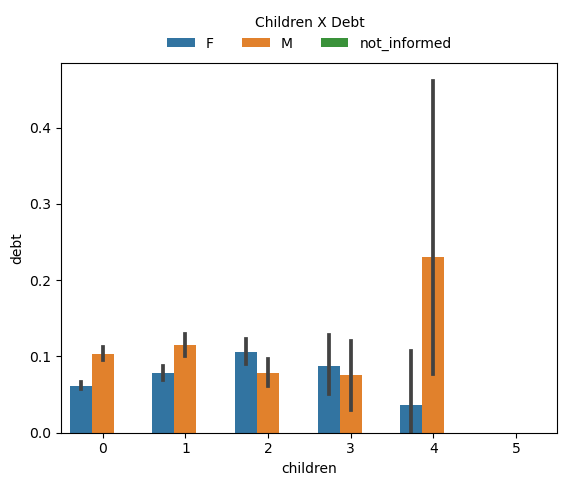

In [81]:
ax3 = sns.barplot(data=df, x='children', y='debt', hue= 'gender')
sns.move_legend(ax3, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Children X Debt', frameon=False)

In [82]:
classes = [0, 20, 60, 100]
labels = ['young', 'adult', 'elderly']
idade = pd.cut(x=df.dob_years, bins=classes, labels=labels)
idade

0          adult
1          adult
2          adult
3          adult
4          adult
          ...   
21520      adult
21521    elderly
21522      adult
21523      adult
21524      adult
Name: dob_years, Length: 21424, dtype: category
Categories (3, object): ['young' < 'adult' < 'elderly']

In [83]:

df['age_group_2'] = idade
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,age_group_2
0,1,8437.673028,42,bachelors_degree,0,married,0,F,employee,0,40620.102,Real Estate,40-50,adult
1,1,4024.803754,36,secondary_education,1,married,0,F,employee,0,17932.802,Car,30-40,adult
2,0,5623.422610,33,secondary_education,1,married,0,M,employee,0,23341.752,Real Estate,30-40,adult
3,3,4124.747207,32,secondary_education,1,married,0,M,employee,0,42820.568,Education,30-40,adult
4,0,340266.072047,53,secondary_education,1,civil_partnership,1,F,retiree,0,25378.572,Wedding,50-60,adult


In [84]:
df.total_income.describe()

count     21424.000000
mean      26597.497780
std       15649.781355
min        3306.762000
25%       17251.992000
50%       24844.712500
75%       31281.368000
max      362496.645000
Name: total_income, dtype: float64

In [85]:
classe = [0, 5000, 15000, 20000, 30000, 400000]
label = ['E', 'D', 'C', 'B', 'A']
income = pd.cut(x=df.total_income, bins=classe, labels=label)
df['classes'] = income
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,age_group_2,classes
0,1,8437.673028,42,bachelors_degree,0,married,0,F,employee,0,40620.102,Real Estate,40-50,adult,A
1,1,4024.803754,36,secondary_education,1,married,0,F,employee,0,17932.802,Car,30-40,adult,C
2,0,5623.422610,33,secondary_education,1,married,0,M,employee,0,23341.752,Real Estate,30-40,adult,B
3,3,4124.747207,32,secondary_education,1,married,0,M,employee,0,42820.568,Education,30-40,adult,A
4,0,340266.072047,53,secondary_education,1,civil_partnership,1,F,retiree,0,25378.572,Wedding,50-60,adult,B


In [86]:
classe = [0, 5000, 15000, 20000, 30000, 400000]
label = ['E', 'D', 'C', 'B', 'A']

frequencia = pd.value_counts(
  pd.cut(x =df.total_income,
         bins = classe,
         labels = label,
         include_lowest = True)
)
frequencia



B    8202
A    5890
D    3697
C    3609
E      26
Name: total_income, dtype: int64

In [87]:
percentual = pd.value_counts(
  pd.cut(x = df.total_income,
         bins = classe,
         labels = label,
         include_lowest = True),
  normalize = True
) * 100
percentual

B    38.284167
A    27.492532
D    17.256348
C    16.845594
E     0.121359
Name: total_income, dtype: float64

In [88]:
dist_freq_renda = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_renda.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,5890,27.492532
B,8202,38.284167
C,3609,16.845594
D,3697,17.256348
E,26,0.121359


In [89]:
# Vamos escrever uma função para categorizar os dados com base em tópicos comuns

df['default'] = df['debt'].apply(lambda x: 'compliant' if x == 0 else 'defaulter')
df
    




,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,age_group_2,classes,default
0,1,8437.673028,42,bachelors_degree,0,married,0,F,employee,0,40620.102,Real Estate,40-50,adult,A,compliant
1,1,4024.803754,36,secondary_education,1,married,0,F,employee,0,17932.802,Car,30-40,adult,C,compliant
2,0,5623.422610,33,secondary_education,1,married,0,M,employee,0,23341.752,Real Estate,30-40,adult,B,compliant
3,3,4124.747207,32,secondary_education,1,married,0,M,employee,0,42820.568,Education,30-40,adult,A,compliant
4,0,340266.072047,53,secondary_education,1,civil_partnership,1,F,retiree,0,25378.572,Wedding,50-60,adult,B,compliant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary_education,1,civil_partnership,1,F,business,0,35966.698,Real Estate,40-50,adult,A,compliant
21521,0,343937.404131,67,secondary_education,1,married,0,F,retiree,0,24959.969,Car,60-70,elderly,B,compliant
21522,1,2113.346888,38,secondary_education,1,civil_partnership,1,M,employee,1,14347.610,Real Estate,30-40,adult,D,defaulter
21523,3,3112.481705,38,secondary_education,1,married,0,M,employee,1,39054.888,Car,30-40,adult,A,defaulter


In [90]:
# Crie uma coluna com as categorias e conte os valores para elas

df.age_group_2.value_counts()


adult      19219
elderly     2140
young         65
Name: age_group_2, dtype: int64

In [91]:
df.classes.value_counts()

B    8202
A    5890
D    3697
C    3609
E      26
Name: classes, dtype: int64

In [92]:
df.default.value_counts()

compliant    19691
defaulter     1733
Name: default, dtype: int64

## Verificar as Hipóteses


**Existe uma correlação entre o nível de renda e do pagamento em dia?**

In [93]:
# Verifique os dados das crianças e do pagamento em dia
# Calcular a taxa de inadimplência com base no número de filhos
pivot_children = df.pivot_table(index='children', columns='debt', values='days_employed', aggfunc='count')
pivot_children['defaulter_(%)'] = pivot_children[1] / (pivot_children[1] + pivot_children[0])*100
pivot_children.sort_values('defaulter_(%)')

debt,0,1,defaulter_(%)
children,,,
0,13022.0,1058.0,7.514205
3,301.0,27.0,8.231707
1,4407.0,442.0,9.115282
2,1915.0,202.0,9.541804
4,37.0,4.0,9.756098
5,9.0,NaN,NaN


Como visto acima, o indice de inadimplemento relacionado com a quantidade de filhos chega a quase 10%.

In [94]:
# Verifique os dados de status da família e do pagamento em dia
# Calcular a taxa padrão com base no status da família
pivot_status = df.pivot_table(index='family_status', columns='debt', values='days_employed', aggfunc='count')
pivot_status['defaulter_(%)'] = pivot_status[1] / (pivot_status[1] + pivot_status[0])*100
pivot_status.sort_values('defaulter_(%)')





debt,0,1,defaulter_(%)
family_status,,,
widow/widower,893,62,6.492147
divorced,1100,85,7.172996
married,11404,927,7.517638
civil_partnership,3770,386,9.287777
unmarried,2524,273,9.760458


**Conclusão**

Bem, a conclusão que se tira é que a maior quantidade de inadimplentes são solteiros.

In [95]:
# Verifique os dados do nível de renda e do pagamento em dia
# Calcular a taxa de inadimplência com base no nível de renda
pivot_class = df.pivot_table(index='classes', columns='debt', values='days_employed', aggfunc='count')
pivot_class['defaulter_(%)'] = pivot_class[1] / (pivot_class[1] + pivot_class[0])*100
pivot_class.sort_values('defaulter_(%)')


debt,0,1,defaulter_(%)
classes,,,
A,5455,435,7.385399
E,24,2,7.692308
D,3402,295,7.979443
B,7509,693,8.449159
C,3301,308,8.534220


**Conclusão**

Concluí-se que pessoas de classe C e B, ou seja, pessoas de classe média, possuem um nível de inadimplência maior.

**Como a finalidade do crédito afeta a taxa de inadimplência?**

In [96]:
# Confira os percentuais de inadimplência para cada finalidade de crédito e analise-os
pivot_purpose = df.pivot_table(index='purpose', columns='debt', values='days_employed', aggfunc='count')
pivot_purpose['defaulter_(%)'] = pivot_purpose[1] / (pivot_purpose[1] + pivot_purpose[0])*100
pivot_purpose.sort_values('defaulter_(%)')

debt,0,1,defaulter_(%)
purpose,,,
Real Estate,10014,779,7.217641
Wedding,2150,184,7.883462
Education,3634,370,9.240759
Car,3893,400,9.317494


In [97]:
pivot_purpose = df.pivot_table(index='age_group_2', columns='debt', values='days_employed', aggfunc='count')
pivot_purpose['defaulter'] = pivot_purpose[1] / (pivot_purpose[1] + pivot_purpose[0])*100
pivot_purpose.sort_values('defaulter')

debt,0,1,defaulter
age_group_2,,,
elderly,2039,101,4.719626
young,60,5,7.692308
adult,17592,1627,8.465581


A taxa de inadimplemento na aquisição de veículos é a maior entre os dados oferecidos. 

# Resposta

O propósito do projeto é uma análise de risco e categorizar possíveis inadimplentes, com o intuito de previnir inadimplência por parte dos pretensos clientes, já que em um empréstimo as características dos clientes e o risco inerentes a essas características. 
Caracteristicas como: quantidade de filhos, idade, quanto ganha, tipo de trabalho, fonte de renda importam, onde mora, quais riscos se expõe no trabalho se risco de morte, ou acidente intereferem na decisão de tomada de decisão por parte das instituições financeiras pois diz respeito a capacidade do cliente cumprir com a sua dívida.

# Conclusão


A presente análise trouxe inicialmente a exploração dos dados, onde foi possível observar  dados ausentes, valores discrepantes, e erros em algumas colunas. 

Após a fase exploratória deu-se início ao tratamento superficial desses dados para que a leitura dos mesmos fosse mais suave, foram tratadas valores extremos, duplicatas explícitas e implícitas, algumas decisões a respeito dos dados foram tomadas, como deletar dados cujo a idade dos clientes era igual a 0, pois sem tal informação que não poderiamos auferir corretamente a idade do cliente, não podendo aferir corretamente o risco intrinseco a essa característica
Foi feito uma categorização nos propósitos apresentados pelos clientes, unindo eles em um propósito único correlacionado o que eles indicaram, como por exemplo, "comprar um carro de segunda mão" apenas para "Carro", pois assim temos dados mais enxutos.

Ainda no tratamento, houve a análise e o tratamento dos valores nulos. Pois fica evidente a relação entre dias trabalhados e valores recebidos, os dados ausentes são claramente simétricos correspondendo a aproximadademente a 10% da quantidade total nos dados, com tal expressividade não poderia ser cogitada a exclusão dos dados, e tais dados são possíveis de preenchimento usando ou a média, ou a mediana, sendo esta usada para tal. 

Ao analisar o conjunto de dias trabalhados percebe-se que há valores negativos e valores exorbitantes, como por exemplo pessoas que trabalharam mais de 100 anos, então a medida tomada foi tratar o valores negativos como valores absolutos pois os dados negativos correspondiam a cerca de 73,89% dos dados totais. 

Seguindo o roteiro proposto no projeto, pate-se então para a verificação e correção da coluna, "dob_years"  que possuiam clientes com idade 0, que como exposto acima foram retirados do conjunto total, pelos motivos já mencionados. 

Foram corrigidos os valores em "education", "family_status" e "income_type", retirando os espaços entre as palavras e colocando "_" para se adequar ao "snake_case" que é o ideal ao python. Houve também a correção do dando de gênero, pois possuia um valor não específicado, "XNA", que foi alterado para "not_informed".

Após isso, toma-se por alvo os erros em "total_income" e "days_employed", de início foi criada uma função com o intuito de criar grupos de idades, de 10 em 10 anos, que preencheu a coluna "age_group". Após isso foi analisado a concentração de valores das rendas e crianda um novo DataFrame sem os valores ausentes e foram calculadas as médias e medianas para serem analisadas e tendo a mediana como escolhida para prencher os valores ausentes pois a média tem como formula o somatório de todos os elementos de um conjunto e dividido pela quantidade desses elementos, logo valores extremos podem influenciar a média e "puxar" ela para um dos extremos.

Então, foi criada uma tabela dinâmica explorando características que poderiam influenciar o quanto o cliente poderia ganhar e os escolhidos foram "age_group","education", "gender", "income_type", pois esses valores correspondem a idade, nível de escolaridade, gênero e tipo de trabalho. Infelizmente sabemos que ainda há essa variação de salários entre homens e mulheres, por isso esse ponto foi abordado no projeto.

Após "total_income" ser tratado, foi o momento de "days_employed". Primeiramente os valores máximos foram exibidos e dívididos por 365,25 (pois temos os anos bissextos em quatro em quatro anos), após analisar o dado vi que os valores mais extremos foram de clientes aposentados e desempregados, logo essas pessoas não poderiam mais ter dias trabalhados, pois eles não estão empregados e a quantidade de hora trabalhada poderia ter sido inserida com erros. então esses valores foram convertidos em "NaN" e começou o tratamento, o foi "plotado" um gráfico do tipo "box" e pode-se observar valores do tipo "outliers", mais uma vez valores que fogem da concentração daquele dado. Então mais uma vez, a mediana foi escolhida para preencher esses dados. 

Uma vez que a tabela foi tratada, deu-se início a categorização dos dados. Primeiramente, se deu a criação dos dados de classes de renda, a saber:

- E 
- D 
- C
- B 
- A

Com isso descobre-se que as classes com maior quantidade de cliente são as classes B e A, isso claramente pode influenciar nos valores finais da análise.
Também começa a criação de uma nova coluna com valores qualitativos de "compliant" e "defaulter", para cliente com débitos ao pagar.

Então, com os dados preparados começa-se a verificar hipóteses.

As principais conclusões foram:

- De acordo com os dados a quantidade de filhos não parece influenciar de forma significativa a inadimplência. Mas não ter filhos aumentam minimamente a chances de adimplência.

- Pessoas solteiras possuem ligeiramente uma propensão a ser inadimplente. Viúvos(as) são os que possuem menores índices de inadimplência.

Conforme a divisão de classes em "total_income" que produziu a variável classes, vemos que o nível de inadiplência não varia muito entre as classes. Apesar dos classe B e da classe C estarem com os maiores índices de inadimplência.

Os empréstimo com finalidade imobiliária, possuem o menor índice de inadimplência, devido a sua possibilidade de tomada do bem e a revenda. Enquanto veículos que foi o maior índice de inadimplência.

